# About Loans
**A  loan is a financial product extended by institutions like banks or finance companies. The loan amount and the interest rate offered by the lender are contingent upon several factors, including the borrower's income, credit score, employment history, the property's value, and the down payment provided by the borrower. These factors collectively determine the borrower's eligibility for the loan and influence the terms and conditions, ensuring that the loan is tailored to suit the borrower's financial situation and the property being purchased.**

In [35]:
# Importing major libraries 

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [2]:
# Loading dataset in df

df=pd.read_csv('loan_sanction_test.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


Summary:

- Gender : 2 (Male, Female)
- Married : 2 (No, Yes)
- Dependents : 4 (0, 1, 2, 3+)
- Education : 2 (Graduate, Not Graduate)
- Self_Employed : 2 (No, Yes)
- Credit_History : 2 (1, 0)
- Property_Area : 3 (Urban, Rural, Semiurban)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


- We have 367 rows and 12 columns
- Here we have 5 Numerical columns and 7 textual colums

In [5]:
# Seeking description of the dataset 

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


This shows all the numerical column with there statistical summary

### Manual Accessing
Dealing with null values 

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Here we can see that -
- Gender has 11 null values. 
- Dependents has 10 null values.
- Self_Employed has 23 null values.
- LoanAmount has 5 null values.
- Loan_Amount_Term has 6 null values.
- Credit_History has 29 null values. 

**removing null values of Gender, Dependents and Self_Employed columns by filling them using mode of their respective columns.**


In [8]:
df.Gender.fillna(df.Gender.mode()[0],inplace=True)

df.Dependents.fillna(df.Dependents.mode()[0],inplace=True)

df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace=True)

df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**removing null values of LoanAmount,Loan_Amount_Term and Credit_History columns by filling them using mean of their respective columns.**


In [10]:
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)

df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(),inplace=True)

df.Credit_History.fillna(df.Credit_History.mean(),inplace=True)


In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

- Now that are data is free of all the null values we will use visualisations to get insights from our data 

## Data Visualisation 

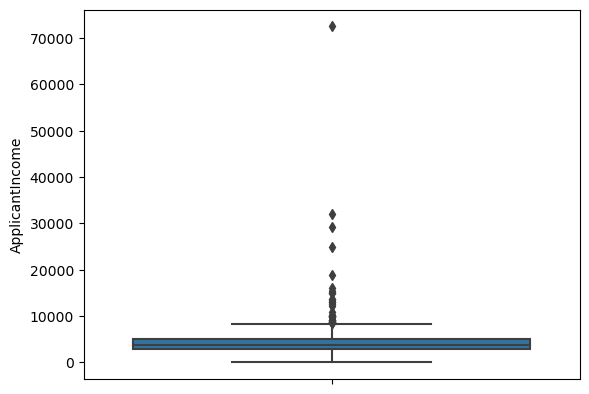

In [12]:
sns.boxplot(data=df,y=df.ApplicantIncome)
plt.show()

- From the above graph we can see that outliers are present in our data 
- Another insight from this box plot is that most of the Applicants have income less than 10000

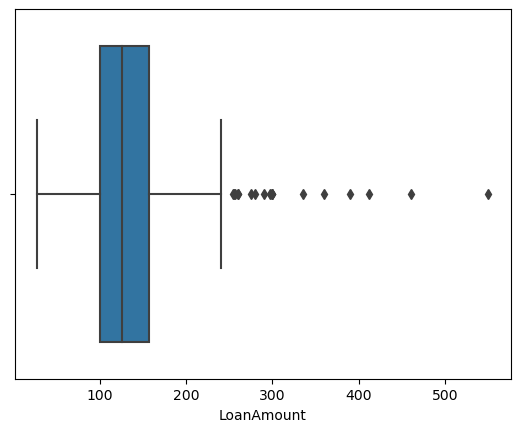

In [14]:
sns.boxplot(data=df,x=df.LoanAmount)
plt.show()

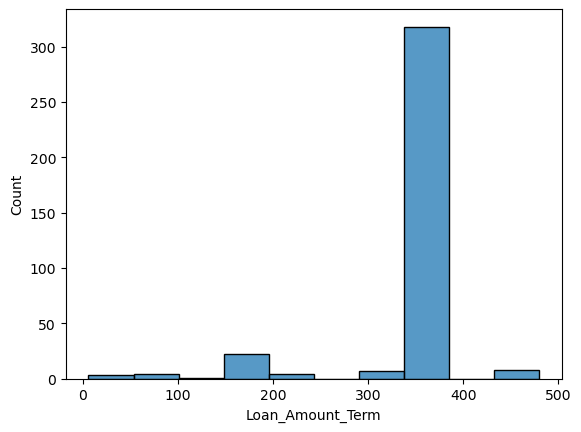

In [30]:
sns.histplot(df.Loan_Amount_Term )
plt.show()

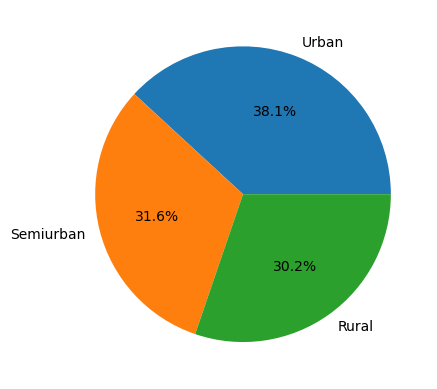

In [16]:
plt.pie(df.Property_Area.value_counts(),labels=df.Property_Area.value_counts().index,autopct='%1.1f%%')
plt.show()

- from this pie chart we can see that **Urban Area** has most of the loan applicants 
- Whereas **semi urban and rural** loan applicants are of almost same percentage 

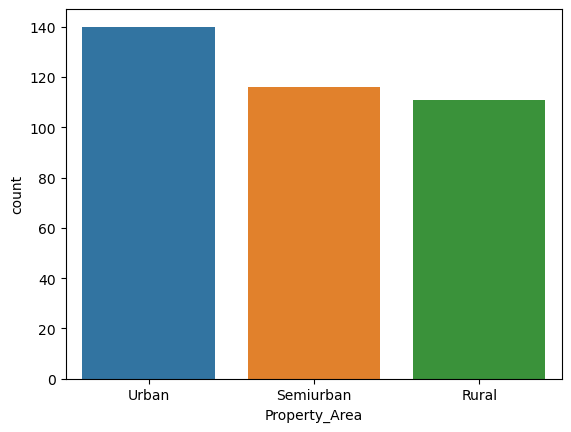

In [17]:
sns.barplot(y=df.Property_Area.value_counts(),x=df.Property_Area.value_counts().index)
plt.show()


- The above graph shows the count of the loan applicants from different areas 
- As we have seen that Urban area has most of the applicants same can be seen in this graph 

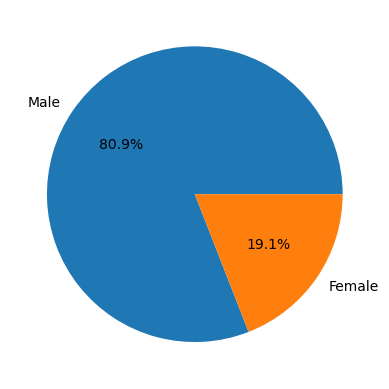

In [20]:
plt.pie(df.Gender.value_counts(),labels=df.Gender.value_counts().index,autopct='%1.1f%%')
plt.show()

- The Pie chart shows that most of the applicants applying for the loans are male and the percentage is significantly higher than females.

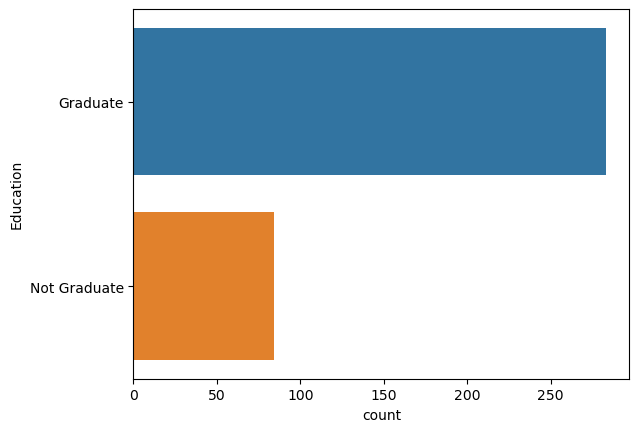

In [34]:
sns.countplot(df, y='Education')
plt.show()

- We can see that most of are applicants are Graduates

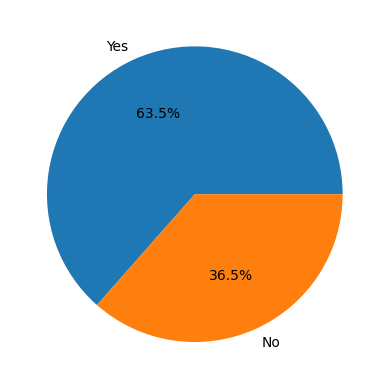

In [21]:
plt.pie(df.Married.value_counts(),labels=df.Married.value_counts().index,autopct='%1.1f%%')
plt.show()

- Mostly Married people are applying for loans  

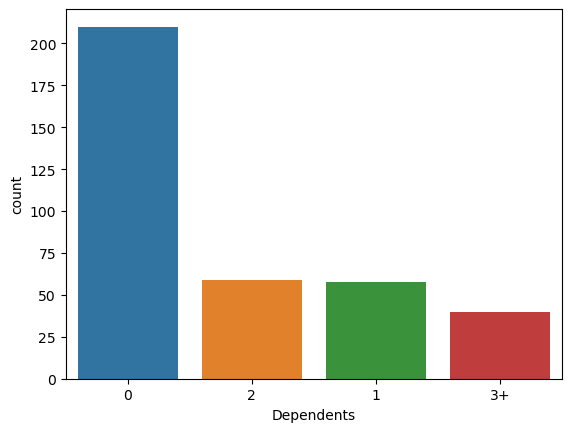

In [22]:
sns.barplot(y=df.Dependents.value_counts(),x=df.Dependents.value_counts().index)
plt.show()

- Here we can see that most of the loan applicants have 0 dependents 


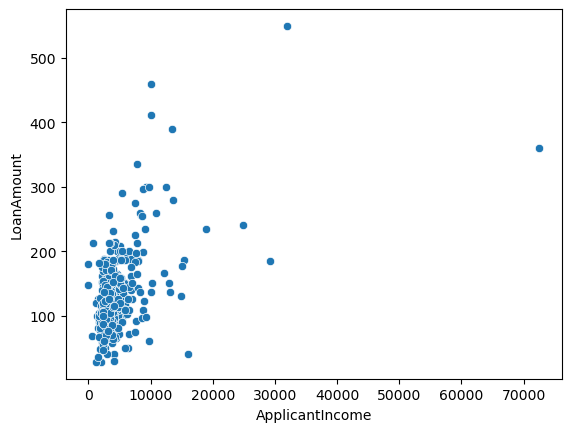

In [23]:
sns.scatterplot(df,x=df.ApplicantIncome,y=df.LoanAmount)
plt.show()

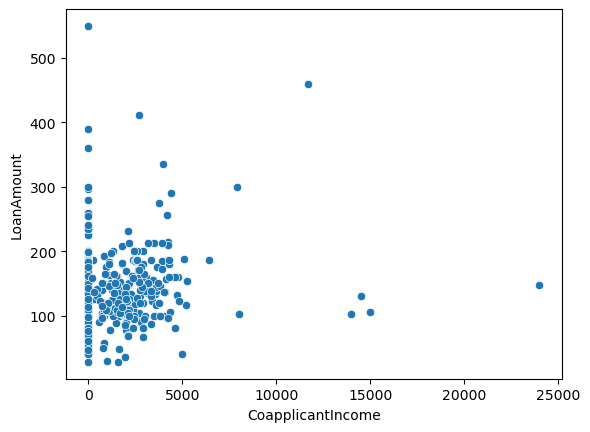

In [24]:
sns.scatterplot(df,x=df.CoapplicantIncome,y=df.LoanAmount)
plt.show()

- most of the Coapplicants income is 0 

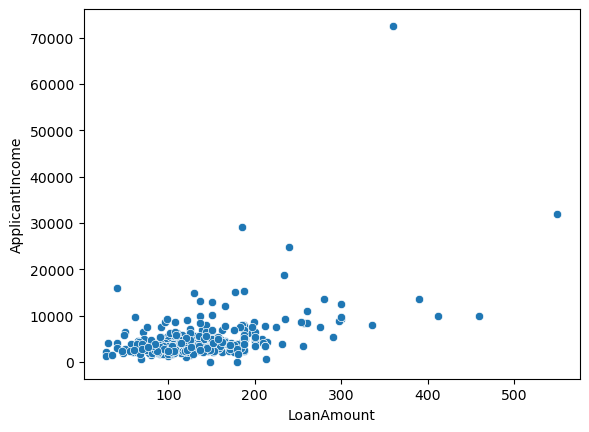

In [33]:
sns.scatterplot(df ,  y='ApplicantIncome' ,  x='LoanAmount')
plt.show()

In [28]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.490174,0.023187,0.094083
CoapplicantIncome,-0.110335,1.000000,0.150112,-0.010940,-0.066798
LoanAmount,0.490174,0.150112,1.000000,0.093856,-0.011405
Loan_Amount_Term,0.023187,-0.010940,0.093856,1.000000,-0.052370
Credit_History,0.094083,-0.066798,-0.011405,-0.052370,1.000000


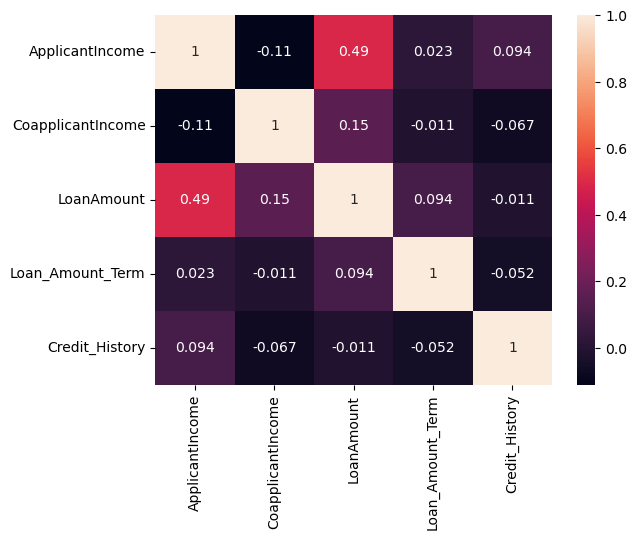

In [27]:
sns.heatmap(df.corr(numeric_only=True) ,annot=True)
plt.show()

- The above heatmap shows the correlation between all the numerical columns

# Conclusions 

- Most of the Applicants have income less than 10000.
- Most of the loan applicants are from Urban Area.
- Most Of the applicants are Male.
- Most of are applicants are Graduates
- From the Heatmap we can see the relation between different columns like 
    + Credit_History has positively strong correlation with Applicant's income whereas Coapplicant's Income has no major relation to the Credit_History so this means they have weak correlation. 
    + Loan Amount has partially strong correlation with Applicant's Income.